In [ ]:
import numpy as np 
import pandas as pd 

# For Preprocesssing Text Data
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Visualizing Wordcloud
from wordcloud import WordCloud

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the train test split
from sklearn.model_selection import train_test_split

# Check Performance
from sklearn.metrics import classification_report

In [ ]:
train = pd.read_csv('/content/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<Axes: >

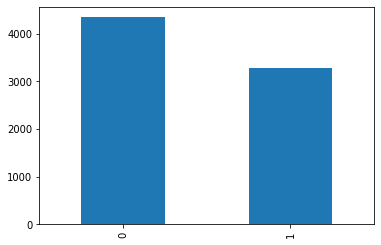

In [ ]:
train['target'].value_counts().plot.bar()

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
def clean_text_data(df):
    df['text_lenght'] = df['text'].apply(lambda x : len(x))
    df['text'] = df['text'].apply(lambda x: x.lower())
    df['text'] = df['text'].apply(remove_punctuations)
    df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
    df['text'] = df['text'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '')



    
    wordnet = WordNetLemmatizer()
    df['text'] = df['text'].apply(lambda x: wordnet.lemmatize(x))
    df['post_text_lenght'] = df['text'].apply(lambda x : len(x))
    
    stop = stopwords.words('english')
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    return df

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
train = clean_text_data(train)
train.head()

<ipython-input-94-affd38780f28>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
<ipython-input-94-affd38780f28>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '')


TypeError: ignored

In [ ]:
y = train['target']
X = train[['text','text_lenght','keyword']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=0) 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(strip_accents='ascii', ngram_range= (1,2))

In [ ]:
tf_idf.fit(X_train['text'])


TfidfVectorizer(ngram_range=(1, 2), strip_accents='ascii')

In [ ]:
X_train_cv = tf_idf.transform(X_train['text']).toarray()
X_val_cv = tf_idf.transform(X_val['text']).toarray()

In [ ]:
pd.DataFrame(X_train_cv, columns= tf_idf.get_feature_names_out())

,0011,0011 utc,001116,001116 utc20150805,0025,0025 updated,005225,005225 utc20150805,010217,010217 okinawa,...,zouma flattened,zourryart,zourryart forgot,zrnf,zss,zss vs,zumiez,zumiez httptcozw5jp46v5ku,zxathetis,zxathetis okay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB().fit(X_train_cv,y_train)

In [ ]:
y_train_pred = nb.predict(X_train_cv)
y_val_pred = nb.predict(X_val_cv)

In [ ]:
print('Train Report ---')
print(classification_report(y_train, y_train_pred))


Train Report ---
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3456
           1       0.98      0.91      0.95      2634

    accuracy                           0.95      6090
   macro avg       0.96      0.95      0.95      6090
weighted avg       0.96      0.95      0.95      6090



In [ ]:
print('Validation Report ---')
print(classification_report(y_val, y_val_pred))

Validation Report ---
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       886
           1       0.84      0.61      0.71       637

    accuracy                           0.79      1523
   macro avg       0.80      0.76      0.77      1523
weighted avg       0.80      0.79      0.78      1523



In [ ]:
import pickle


In [ ]:
pickle.dump(nb, open('model.pkl', 'wb'))

In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [ ]:
test = clean_text_data(test)

In [ ]:
test.head()

,id,keyword,location,text,text_lenght,post_text_lenght
0,0,NaN,NaN,happened terrible car crash,34,34
1,2,NaN,NaN,heard earthquake different cities stay safe ev...,64,61
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...,96,94
3,9,NaN,NaN,apocalypse lighting spokane wildfires,40,37
4,11,NaN,NaN,typhoon soudelor kills 28 china taiwan,45,45


In [ ]:
test_inputs = test[['keyword','text','text_lenght']]

In [ ]:
tf_idf_test = TfidfVectorizer(strip_accents='ascii', ngram_range= (1,2))
tf_idf_test.fit(test_inputs['text'])


TfidfVectorizer(ngram_range=(1, 2), strip_accents='ascii')

In [ ]:
test_cv = tf_idf.transform(test_inputs['text']).toarray()
print(test_cv)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
predict = pickled_model.predict(test_cv)

In [ ]:
my_dataframe = pd.DataFrame(predict, columns=['target'])

In [ ]:
test = pd.concat([test, my_dataframe], axis = 1)
test.head()

,id,keyword,location,text,text_lenght,post_text_lenght,predicted_value,predicted_value,target
0,0,NaN,NaN,happened terrible car crash,34,34,1,1,1
1,2,NaN,NaN,heard earthquake different cities stay safe ev...,64,61,0,0,0
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...,96,94,1,1,1
3,9,NaN,NaN,apocalypse lighting spokane wildfires,40,37,1,1,1
4,11,NaN,NaN,typhoon soudelor kills 28 china taiwan,45,45,1,1,1


In [ ]:
submission = test[['id','target']]
submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [ ]:
submission.to_csv('output.csv')